In [44]:
#import all the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline

#models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [13]:
#load data 
df = pd.read_csv("adjusted mood data.csv")
df.shape


(148, 12)

In [14]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist,mood
0,0.0102,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,Mask Off,Future,0
1,0.1990,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino,2
2,0.0344,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,Xanny Family,Future,2
3,0.6040,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,Master Of None,Beach House,1
4,0.1800,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,Parallel Lines,Junior Boys,1


In [15]:
#Let's find out how many of each class there are 
df["mood"].value_counts()

0    47
3    39
2    36
1    26
Name: mood, dtype: int64

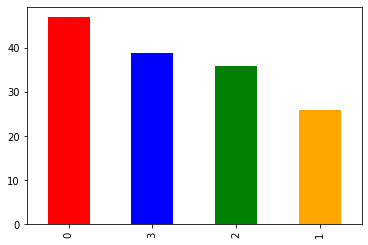

In [18]:
df["mood"].value_counts().plot(kind="bar", color=["red", "blue", "green", "orange"])
#0 = happy, 1 = sad, 2 = calm, 3 = exciting

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      148 non-null    float64
 1   danceability      148 non-null    float64
 2   energy            148 non-null    float64
 3   instrumentalness  148 non-null    float64
 4   liveness          148 non-null    float64
 5   loudness          148 non-null    float64
 6   speechiness       148 non-null    float64
 7   tempo             148 non-null    float64
 8   valence           148 non-null    float64
 9   song_title        148 non-null    object 
 10  artist            148 non-null    object 
 11  mood              148 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 12.8+ KB


In [20]:
#Are there any missing values
df.isna().sum()

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
song_title          0
artist              0
mood                0
dtype: int64

In [21]:
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mood
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.157763,0.647264,0.647460,0.140012,0.206644,-7.566291,0.101809,119.895581,0.510784,1.452703
std,0.222304,0.159601,0.189089,0.258040,0.159088,3.127783,0.100059,25.601776,0.250266,1.191435
min,0.000008,0.191000,0.086100,0.000000,0.018800,-21.226000,0.026100,64.992000,0.035900,0.000000
25%,0.010200,0.548500,0.512750,0.000000,0.097050,-8.880750,0.038325,104.525250,0.300000,0.000000
50%,0.046950,0.664500,0.661500,0.000161,0.156000,-6.920500,0.056300,120.067000,0.483500,2.000000
75%,0.235500,0.763500,0.795750,0.126250,0.272250,-5.521000,0.127000,135.593500,0.723250,3.000000
max,0.918000,0.959000,0.981000,0.921000,0.769000,-1.710000,0.455000,203.822000,0.973000,3.000000


In [22]:
# Mood according to energy
df.energy.value_counts()

0.8140    3
0.4010    3
0.4340    3
0.6030    2
0.5810    2
         ..
0.3250    1
0.0861    1
0.6910    1
0.5530    1
0.5000    1
Name: energy, Length: 129, dtype: int64

In [23]:
# compare mood column with energy column
pd.crosstab(df.mood, df.energy)

energy,0.0861,0.1360,0.2170,0.2280,0.2520,0.2530,0.3250,0.3380,0.3480,0.3590,...,0.9250,0.9280,0.9440,0.9450,0.9480,0.9500,0.9550,0.9570,0.9640,0.9810
mood,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
1,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,1,0,0,1,1


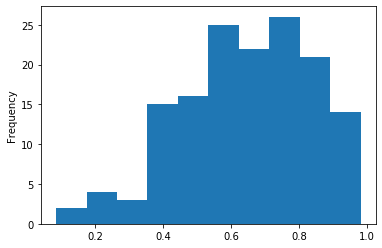

In [26]:
df.energy.plot.hist()
#majority of our dataset has greate than 0.4 energy

In [27]:
df.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mood
acousticness,1.000000,-0.266147,-0.448666,0.247164,-0.105827,-0.380112,-0.156885,-0.028728,-0.044674,-0.108866
danceability,-0.266147,1.000000,-0.032724,-0.311984,-0.081516,0.036492,0.184333,-0.042684,0.349054,0.039472
energy,-0.448666,-0.032724,1.000000,-0.224298,0.210794,0.727721,0.032157,0.036762,0.333104,-0.042933
instrumentalness,0.247164,-0.311984,-0.224298,1.000000,-0.051341,-0.382744,-0.204631,-0.022704,-0.087092,-0.170247
liveness,-0.105827,-0.081516,0.210794,-0.051341,1.000000,0.133338,0.161999,-0.059950,-0.125164,0.161895
loudness,-0.380112,0.036492,0.727721,-0.382744,0.133338,1.000000,0.137118,0.079525,0.097275,0.086143
speechiness,-0.156885,0.184333,0.032157,-0.204631,0.161999,0.137118,1.000000,0.201983,-0.103191,0.332615
tempo,-0.028728,-0.042684,0.036762,-0.022704,-0.059950,0.079525,0.201983,1.000000,0.074457,0.083681
valence,-0.044674,0.349054,0.333104,-0.087092,-0.125164,0.097275,-0.103191,0.074457,1.000000,-0.294910
mood,-0.108866,0.039472,-0.042933,-0.170247,0.161895,0.086143,0.332615,0.083681,-0.294910,1.000000


(10.0, 0.0)

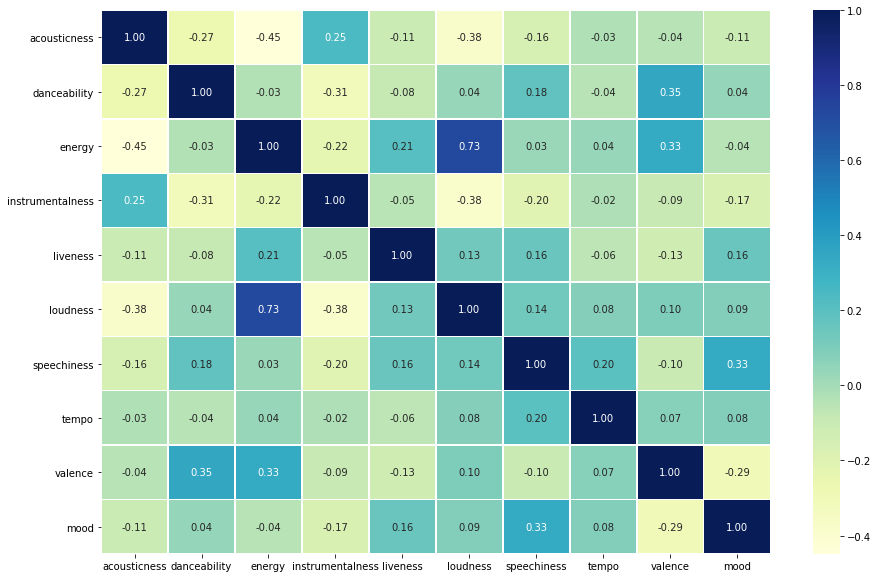

In [30]:
#Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt=".2f", 
                 cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [31]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist,mood
0,0.0102,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,Mask Off,Future,0
1,0.1990,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino,2
2,0.0344,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,Xanny Family,Future,2
3,0.6040,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,Master Of None,Beach House,1
4,0.1800,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,Parallel Lines,Junior Boys,1


In [36]:
#Split data into x and  y 
X = df.drop(["mood", "song_title", "artist"], axis=1)
y = df["mood"]

In [37]:
# Split data into train and test sets
np.random.seed(42)
#Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
136,0.01300,0.853,0.560,0.0000,0.0944,-4.961,0.0406,134.066,0.853
45,0.00631,0.715,0.833,0.0000,0.1640,-5.379,0.1080,95.487,0.607
119,0.02500,0.854,0.460,0.0000,0.1280,-9.710,0.1400,97.512,0.492
27,0.01800,0.646,0.837,0.0403,0.3160,-6.615,0.1340,100.040,0.320
4,0.18000,0.678,0.561,0.5120,0.4390,-11.648,0.0694,174.004,0.904


In [52]:

#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(), "Linear Regression": LinearRegression(), 
          "Decision Tree": DecisionTreeClassifier(), "SVC": SVC() }

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models 
    """
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores ={}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [53]:
model_scores = fit_and_score(models=models, X_train=X_train,
                            X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will cha

{'Logistic Regression': 0.4666666666666667,
 'KNN': 0.3333333333333333,
 'Random Forest': 0.36666666666666664,
 'Linear Regression': 0.16440276837963141,
 'Decision Tree': 0.5333333333333333,
 'SVC': 0.3333333333333333}

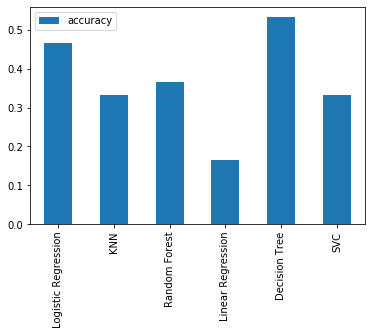

In [54]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [64]:
#Lets tune KNN
train_scores = []
test_scores = []
#Create a list of different values of n neighbors 
neighbors = range(1,21)
#Setup KNN instance
knn = KNeighborsClassifier()
#loop trhough different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorithm
    knn.fit(X_train, y_train)
    #update the traaining scores lit
    train_scores.append(knn.score(X_train, y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Test score is: 50.0%


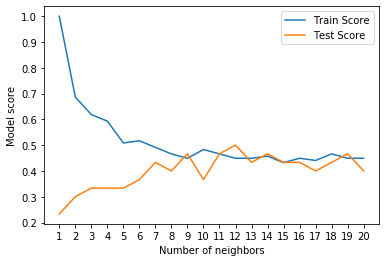

In [66]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print("Test score is: " + str(max( test_scores)*100) + "%")

In [87]:
#CV stands for cross validation 
#Create a hyperparameter grid for LogisticRgression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50), "max_depth": [None, 3,5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [88]:
#Tune LogisticRegression
np.random.seed(42)
#Setup random hyperparamteter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, 
                                cv=5, n_iter=20, verbose=True)
#Fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\linear_model\logistic.

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [89]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [90]:
rs_log_reg.score(X_test, y_test)

0.5

In [91]:
#Setup random seed
np.random.seed(42)
#setup random hyperparamter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                          cv=5, n_iter=20, verbose=True)
#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.3s finished
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [93]:
#Find the best hyperpararmeters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [94]:
# Evaluate the ranomdized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.5666666666666667

In [135]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid =  {"max_depth": [3, None],
#               "max_features": [0., 0.1, 0.2],
              "min_samples_split": [3, 5, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(RandomForestClassifier(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\e

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default v

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default v

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default v

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default v

C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\franklin.liu\Documents\projects\ml-stuff\Heart disease project\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default v

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [136]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [137]:
#Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.6

In [138]:
model_scores

{'Logistic Regression': 0.4666666666666667,
 'KNN': 0.3333333333333333,
 'Random Forest': 0.36666666666666664,
 'Linear Regression': 0.16440276837963141,
 'Decision Tree': 0.5333333333333333,
 'SVC': 0.3333333333333333}